# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chrishan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin AND Bitcoin AND BTC AND XBT",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum AND Ethereum AND ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-13,Bitcoin golden physical coin illustration on U...,0.4215,0.083,0.0,0.917
1,2021-06-12,jpgfactory / Getty Images\r\nElon Musk made wa...,0.7645,0.197,0.0,0.803


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-10,This article was translated from our Spanish e...,-0.3400,0.000,0.066,0.934
1,2021-06-15,"Sir Tim Berners-Lee, credited as the inventor ...",0.3612,0.065,0.000,0.935
2,2021-06-16,ENS stands for Ethereum Name Service and it is...,0.0000,0.000,0.000,1.000
3,2021-06-13,"In February 2021, Figma CEO Dylan Fields sold ...",0.0000,0.000,0.000,1.000
4,2021-06-29,The internet nowadays is ephemeral. Layers upo...,0.4939,0.155,0.070,0.775


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,2.000000,2.00000,2.0,2.00000
mean,0.593000,0.14000,0.0,0.86000
std,0.242538,0.08061,0.0,0.08061
min,0.421500,0.08300,0.0,0.80300
25%,0.507250,0.11150,0.0,0.83150
50%,0.593000,0.14000,0.0,0.86000
75%,0.678750,0.16850,0.0,0.88850
max,0.764500,0.19700,0.0,0.91700


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.161553,0.066580,0.030770,0.902660
std,0.390095,0.061771,0.049076,0.070583
min,-0.636900,0.000000,0.000000,0.756000
25%,0.000000,0.000000,0.000000,0.852000
50%,0.166050,0.065000,0.000000,0.907500
75%,0.445000,0.100000,0.062750,0.953250
max,0.836000,0.212000,0.179000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score of 0.14.

Q: Which coin had the highest compound score?

A: Ether had the highest compound score of 0.836.

Q. Which coin had the highest positive score?
   
A: Ether had the highest positive score of 0.212.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words("english"))

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub("", text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    output = [word.lower() for word in lem]

    # Remove the stop words
    tokens = [word for word in output if word not in sw]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = [tokenizer(text) for text in btc_df["text"]]
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-13,Bitcoin golden physical coin illustration on U...,0.4215,0.083,0.0,0.917,"[bitcoin, golden, physical, coin, illustration..."
1,2021-06-12,jpgfactory / Getty Images\r\nElon Musk made wa...,0.7645,0.197,0.0,0.803,"[jpgfactory, getty, imageselon, musk, made, wa..."


In [14]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = [tokenizer(text) for text in eth_df["text"]]
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-10,This article was translated from our Spanish e...,-0.3400,0.000,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
1,2021-06-15,"Sir Tim Berners-Lee, credited as the inventor ...",0.3612,0.065,0.000,0.935,"[sir, tim, bernerslee, credited, inventor, wor..."
2,2021-06-16,ENS stands for Ethereum Name Service and it is...,0.0000,0.000,0.000,1.000,"[ens, stand, ethereum, name, service, decentra..."
3,2021-06-13,"In February 2021, Figma CEO Dylan Fields sold ...",0.0000,0.000,0.000,1.000,"[february, figma, ceo, dylan, fields, sold, pi..."
4,2021-06-29,The internet nowadays is ephemeral. Layers upo...,0.4939,0.155,0.070,0.775,"[internet, nowadays, ephemeral, layers, upon, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_big_string = ' '.join(btc_df["text"])
btc_processed = tokenizer(btc_big_string)
Counter(ngrams(btc_processed, n=2)).most_common(10)

[(('bitcoin', 'golden'), 1),
 (('golden', 'physical'), 1),
 (('physical', 'coin'), 1),
 (('coin', 'illustration'), 1),
 (('illustration', 'united'), 1),
 (('united', 'states'), 1),
 (('states', 'dollar'), 1),
 (('dollar', 'banknote'), 1),
 (('banknote', 'visual'), 1),
 (('visual', 'representation'), 1)]

In [17]:
# Generate the Ethereum N-grams where N=2
eth_big_string = ' '.join(eth_df["text"])
eth_processed = tokenizer(eth_big_string)
Counter(ngrams(eth_processed, n=2)).most_common(10)

[(('ether', 'eth'), 13),
 (('char', 'ethereum'), 12),
 (('bitcoin', 'btc'), 10),
 (('ethereum', 'eth'), 8),
 (('char', 'bitcoin'), 7),
 (('decentralized', 'finance'), 6),
 (('finance', 'defi'), 6),
 (('crypto', 'market'), 5),
 (('eth', 'price'), 5),
 (('alltime', 'high'), 4)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_processed)

[('bitcoin', 4),
 ('cryptocurrency', 2),
 ('char', 2),
 ('golden', 1),
 ('physical', 1),
 ('coin', 1),
 ('illustration', 1),
 ('united', 1),
 ('states', 1),
 ('dollar', 1)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_processed)

[('char', 100),
 ('ethereum', 54),
 ('eth', 34),
 ('ha', 32),
 ('bitcoin', 28),
 ('ether', 20),
 ('cryptocurrency', 14),
 ('crypto', 14),
 ('market', 14),
 ('trading', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

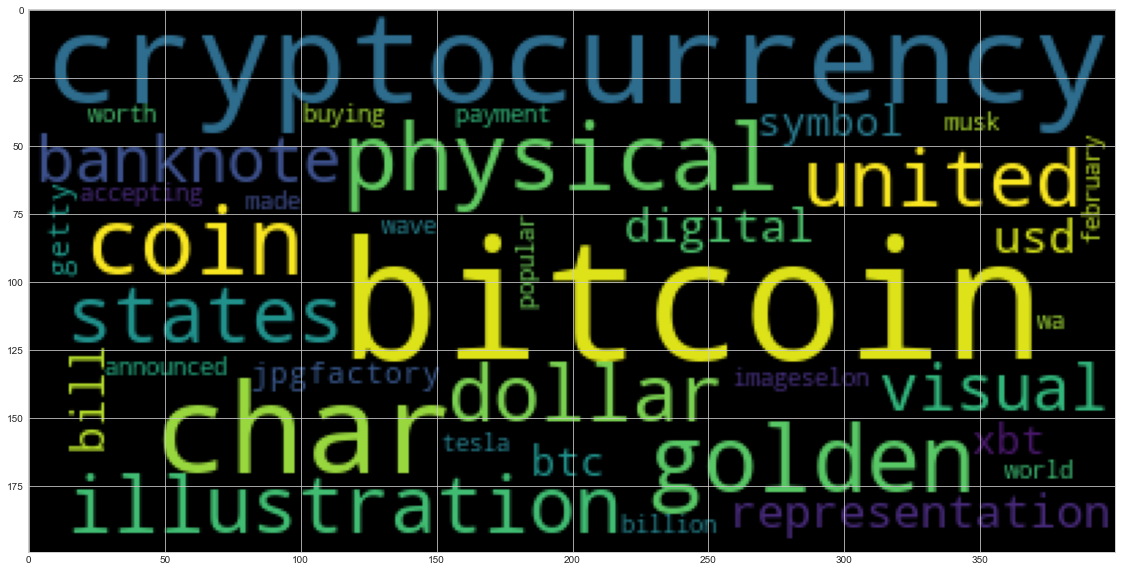

In [22]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_processed))
plt.imshow(wc)

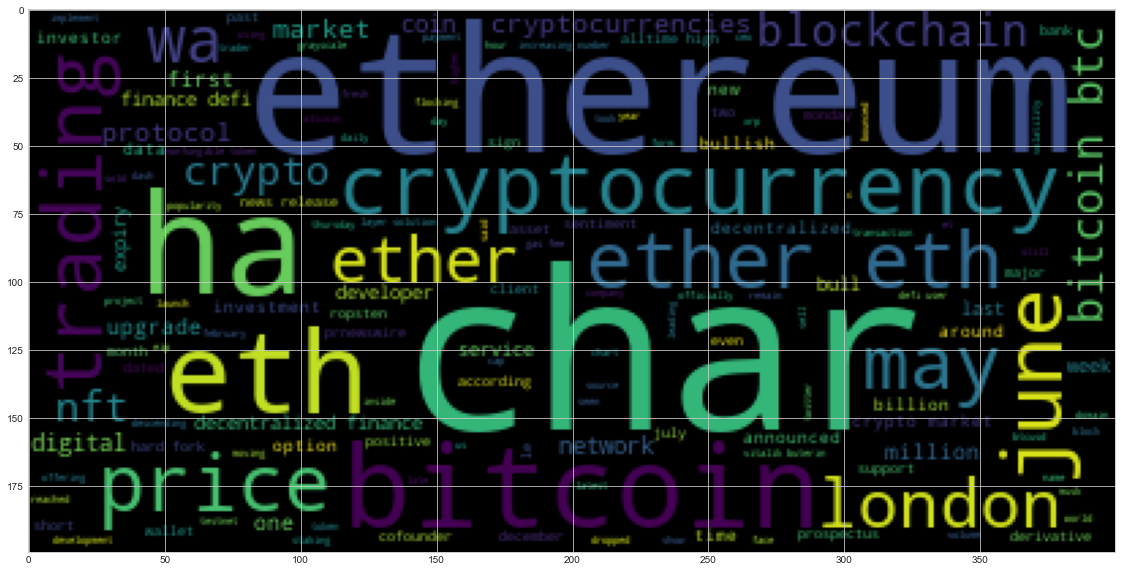

In [23]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_processed))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_big_string

'Bitcoin golden physical coin illustration on United States Dollar banknotes. Visual representations ... [+] of the digital Cryptocurrency Bitcoin with the USD bill. Bitcoin with the symbol BTC, XBT i… [+11077 chars] jpgfactory / Getty Images\r\nElon Musk made waves in February when he announced that Tesla was buying $1.5 billion worth of Bitcoin and accepting the worlds most popular cryptocurrency as payment for i… [+8928 chars]'

In [28]:
# Run the NER processor on all of the text
doc_btc = nlp(btc_big_string)

# Add a title to the document
doc_btc.user_data["title"] = "Named Entity Recognition - BTC"

In [29]:
# Render the visualization
displacy.render(doc_btc, style="ent")

In [30]:
# List all Entities
for ent in doc_btc.ents:
    print(ent.text, ent.label_, str(spacy.explain(ent.label_)))

United States Dollar ORG Companies, agencies, institutions, etc.
USD ORG Companies, agencies, institutions, etc.
BTC ORG Companies, agencies, institutions, etc.
XBT ORG Companies, agencies, institutions, etc.
Getty Images ORG Companies, agencies, institutions, etc.
Elon Musk PERSON People, including fictional
February DATE Absolute or relative dates or periods
Tesla PERSON People, including fictional
$1.5 billion MONEY Monetary values, including unit


---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_big_string

'This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars] Sir Tim Berners-Lee, credited as the inventor of the World Wide Web, is selling the source code for his invention as an NFT at a Sotheby\'s auction.\xa0\r\nThe NFT, or non-fungible token, is a type of cryp… [+2698 chars] ENS stands for Ethereum Name Service and it is a decentralized domain name system built on the Ethereum blockchain. You can get domains with the .eth extension by going here, connecting a wallet, and… [+1098 chars] In February 2021, Figma CEO Dylan Fields sold a piece of NFT art for $7.5 million. Similarly, Twitter co-founder Jack Dorsey sold his first tweet on Twitter as an NFT for $2,915,835.47.\r\nAn NFT (non-… [+24897 chars] The internet nowadays is ephemeral. Layers upon layers of trusted 3rd parties are necessary to distribute content online. It req

In [32]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_big_string)

# Add a title to the document
doc_eth.user_data["title"] = "Named Entity Recognition - ETH"

In [33]:
# Render the visualization
displacy.render(doc_eth, style="ent")

In [34]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text, ent.label_, str(spacy.explain(ent.label_)))

Spanish NORP Nationalities or religious or political groups
AI ORG Companies, agencies, institutions, etc.
Last May DATE Absolute or relative dates or periods
Buterin PERSON People, including fictional
27 CARDINAL Numerals that do not fall under another type
Tim Berners-Lee PERSON People, including fictional
NFT ORG Companies, agencies, institutions, etc.
Sotheby's ORG Companies, agencies, institutions, etc.
NFT ORG Companies, agencies, institutions, etc.
ENS ORG Companies, agencies, institutions, etc.
Ethereum Name Service ORG Companies, agencies, institutions, etc.
Ethereum PERSON People, including fictional
February 2021 DATE Absolute or relative dates or periods
Figma ORG Companies, agencies, institutions, etc.
Dylan Fields PERSON People, including fictional
NFT ORG Companies, agencies, institutions, etc.
$7.5 million MONEY Monetary values, including unit
Twitter PERSON People, including fictional
Jack Dorsey PERSON People, including fictional
first ORDINAL "first", "second", etc.


---